# Outlines
- Conditional probabilities
- Joint probabilities
- Marginalization
- Law of total probabilities
- Bayes law
- Birthday Paradox
- AI doom
- Monte Hall Puzzle
- Belief Network (Bayesian Network)

In [1]:
from IPython.display import Image

## David Deutsch articulates why it’s a futile and non rigorous exercise to engage with Bayesian doomers

https://x.com/AravSrinivas/status/1737523523294527904?s=20

Fundamental disconnect between Bayesian approach and doomers (without an updatable rules/policy) ??? and 
Probability arose from the Bayesian apporoach
Subjective probability (Bayesian probability) focuses on 

$P(\underbrace{A \cap B}_\text{a set (events)})$: The probability that some event happened (a set of outcomes) that is a set of outcomes present in both the events A and B.
$$P(A|B):=\frac{P_S(A \cap B)}{P_S(A)}$$ ... $(1)$
- $(1)$, in plain English: "The probability given we know for sure event A has occurred"
- Notation: $:=$ means "defined as"
- $S$ is a Sample Space <-- "Set of all possible outcomes."
- But now the Sample Space has been updated to $S'=A$.
$$P_{S'}(B)\neq P_S(B)$$
$$P_S(A|A) = P_{S'}(A|A) = 1$$

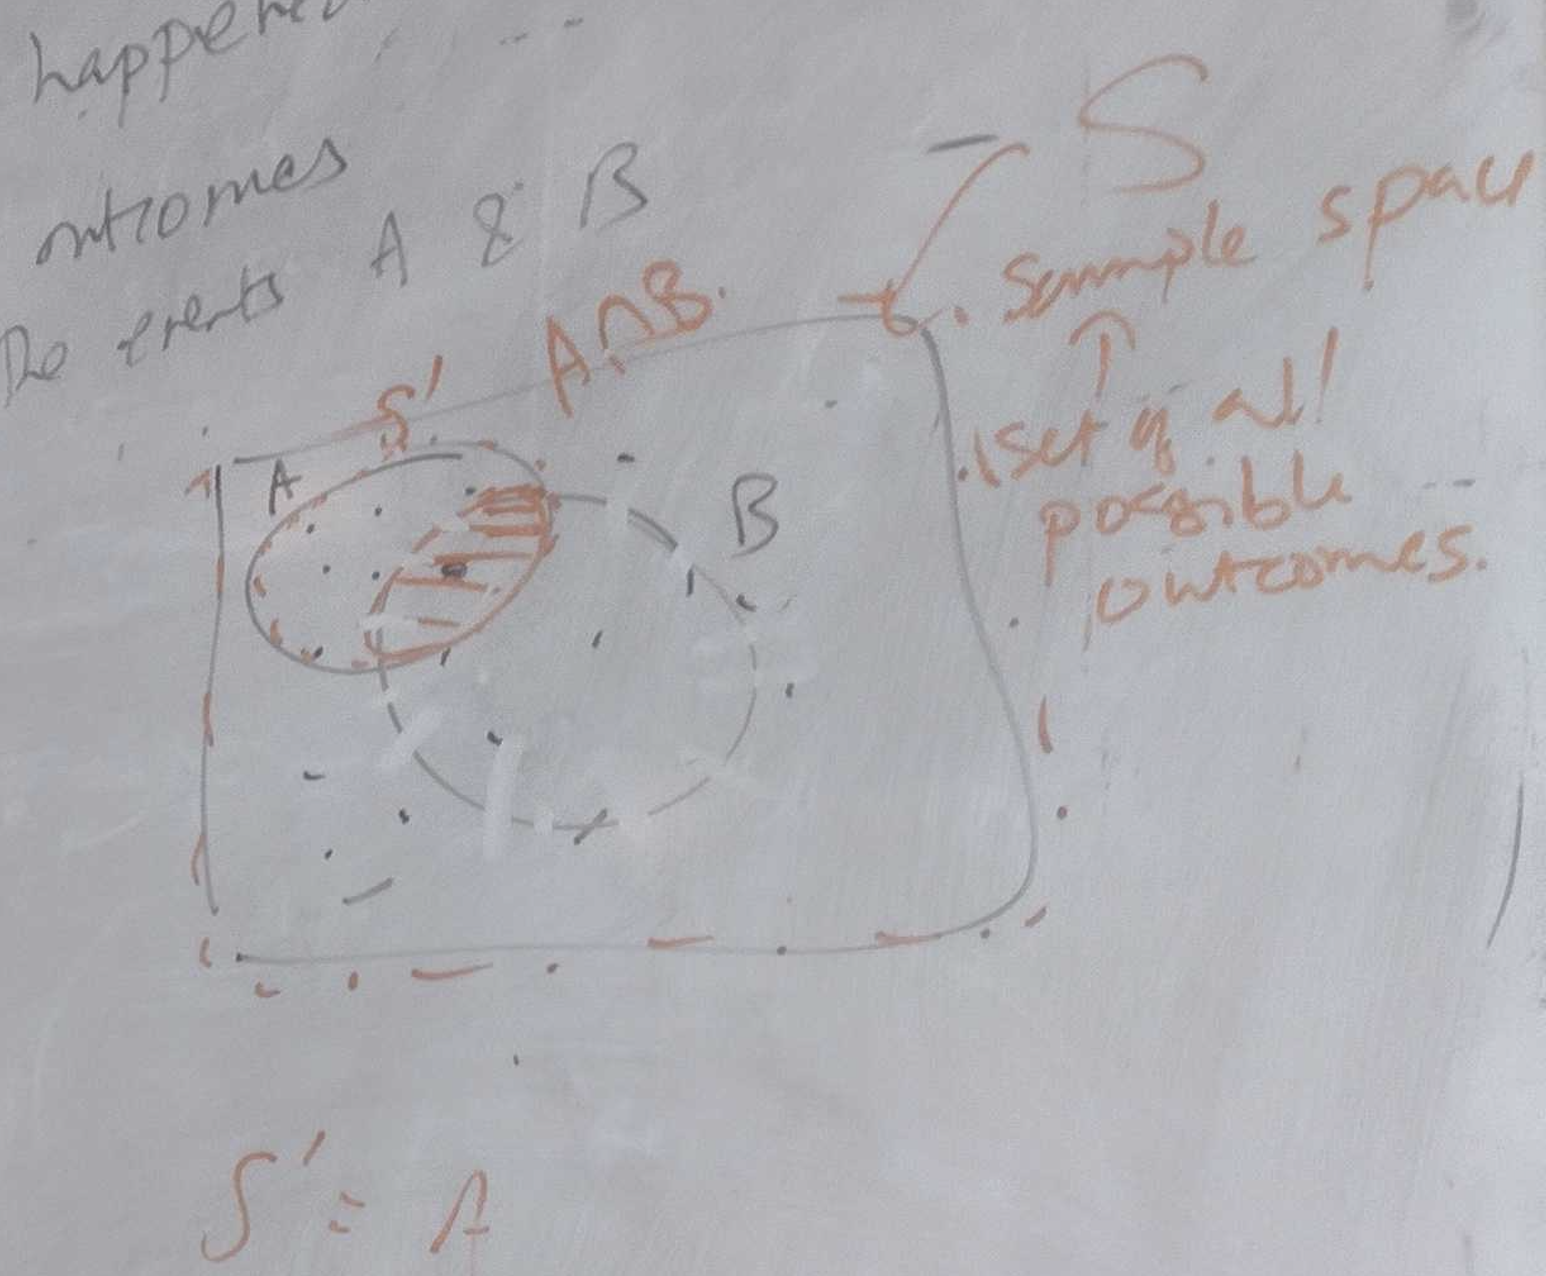

In [7]:
Image(filename='images/session2/sample_space_update.png', width =550)


$$P(A|B)=\frac{P(A \cap B)}{P(B)}$$
Again, shifting the Sample Space to a narrower focus. Now All possible outcome in this perspective is area(B). So naturally (and algebraically), to get $P(A \cap B)$, compute $$P()A \cap BP(A|B)P(B)$$

## Review
### Independent Events
$$P(A \cap B)=P(A)P(B) \text{ .......... (1)}$$
$$P(A|B)=P(A) \text{ .......... (2)}$$ 
(2) assumes $P(A \cap B)=\varnothing$
### Exclusive/Disjoint
$$P(A \cup B)=P(A)+P(B) \text{, if A and B are disjoint .......... (3)}$$
Note $P(A \cup B)=P(A)+P(B)-P(A \cap B) \text{, if A and B are NOT disjoint} $

## Law of Total Probability
$$P(A)=P(A \cap B_1) + P(A \cap B_2) + ... + P(A \cap B_n)$$
$$A=P(A \cap B_1) \cup P(A \cap B_2) \cup ... \cup P(A \cap B_n)$$

### Partitioning S
A set of events that are exclusive/disjoint and their sum is $S$
$$S=B_1+B_2+...+B_n$$
$$S=\sum^6_{i=1}B_i$$

See drawing on the left shown below.

### Use Case
Events:
- C - "Chip still works after t seconds". Does not imply whether the chip is good or bad.
- G - "Chip is good"
- B - "Chip is bad"
$$P(C)=P(C|G)P(G)+P(C|B)P(B)$$
$$=P(C \cap G)\cup P(C \cap B )$$
$$\text{Note that we can simply add the probabilities because the two events are disjoint}$$
The expression above decomposes the probability, each component conditioned on different criteria.
- Bad chip
    - Exponential failure with rate 1000x
- Good chip
    - Exponential with rate $\alpha$
    
See drawing on the right shown below.

### Application
- NC - Not infected with COVID
- V - Vaccinated
- NV - Not vaccinated
$$P(NC)=P(NC|V)P(V)+P(NC|NV)P(NV)$$

By increasing the probability of getting vaccinated, we can increase the chance of not getting infected with COVID


### Final Note
The Law of Total Probability is useful when you want to incorporate prior knowledge into the probability analysis/calculations. It gives a framework. It is a fundamental concept in Bayesian statistics.

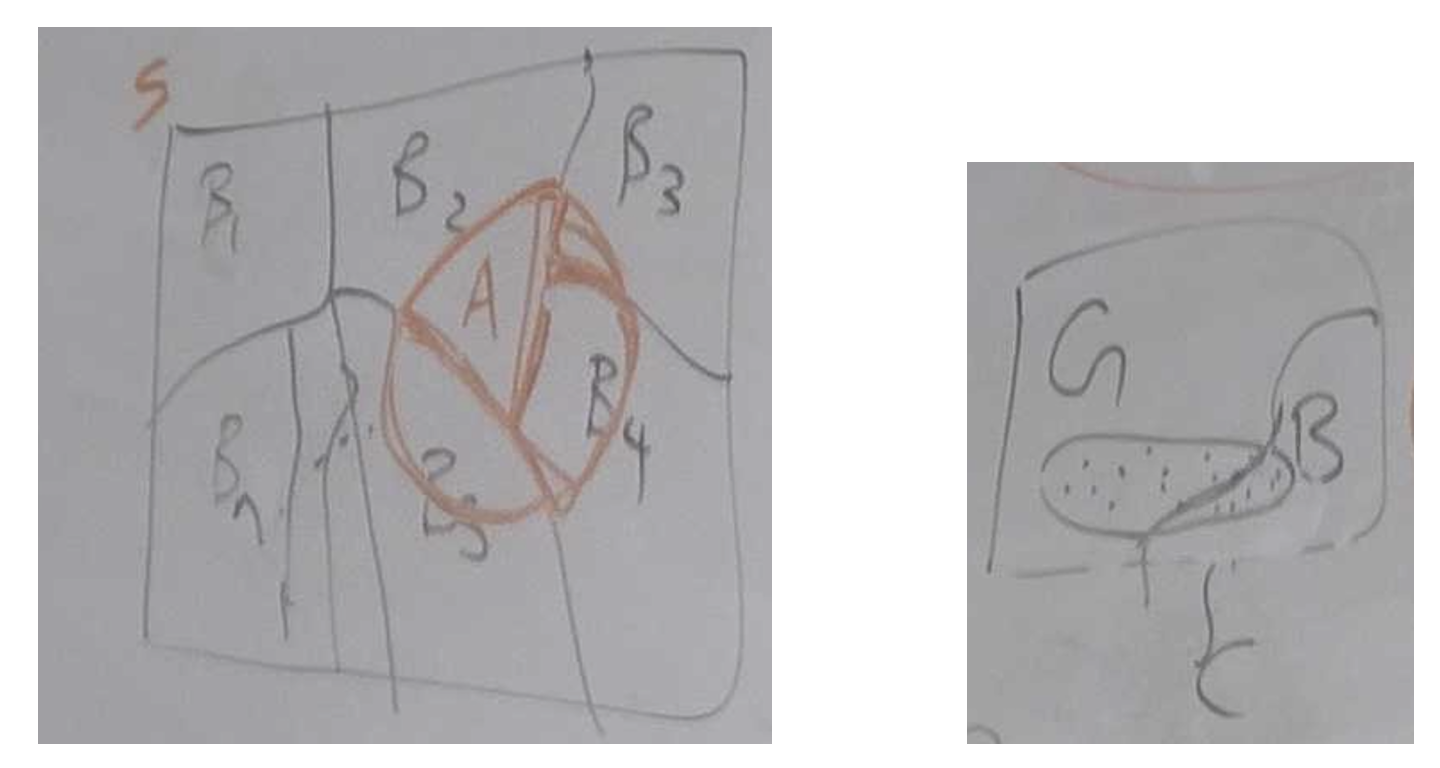

In [9]:
Image(filename='images/session2/Screenshot2023-12-24at 6.06.52.png')

## Marginalization
Take all of the possible scenarios that event A could have occurred, sum them up to estimate the probablity $P(A)$ as a whole.

When dealing with complex systems/dataset, marginalization allows:
- Simplification
- Shift focus and dimension for clearer insight
- Efficient computation
- Help draw clearer insights
- Understand relationships between variables



## Baye's Law

Assumptions: 
- $B_I$ = Partition
- A = Posterior
- $B_i$ = from a physics model
- $P(B_i)$ = Prior distribution

$$P(B_i|A) = \frac{P(A|B_i)P(B_i)}{P(A|B_1)+P(A|B_2)+...+P(A|B_n)}$$

- Notice the switched order of conditioned $P(B_i|A)$ (LHS of the equal sign) and $P(A|B_i)$ (RHS)

$$= \frac{P(A|B_i)P(B_i)}{\sum_{j=1}^n P(A \cap B_j)}$$
$$= \boxed{\frac{P(A|B_i)P(B_i)}{\sum_{j=1}^n P(A|B_j)P(B_j)}}$$

### What does Bayes' Law Allow Us To Do?
- **Incorporate observation** into the probability model
- Talk about probability of an event that has **never happened before** (major difference from frequentists' approach)
    - e.g.  What is the probability that Trump will be elected as a US president in 2024?
- Let's us **quantify probabilities/estimate** events **subjectively**
- Need to have a **good update rule/policy for the model** to achieve a good estimates
- Start with the current distribution (prior knkowledge), and **keep updating the policy based on incoming observations** - iterative model improvement
- Often used in medical research

#### e.g.
- Localization of an object
    - Sensor measurement of the object's location - noisy
    - However, the more data points you obtain, the better estimate your model will have
    - Enough observation will allow the estimate to converge to a reliable estimate
    - Given the location, estimate the signal strength (e.g. given $P(A|B)$, and some other probabilities, estimate $P(B|A)$)
    - Given the signal strength, estimate the distance ("find my iPhon app" example). See the diagram below.



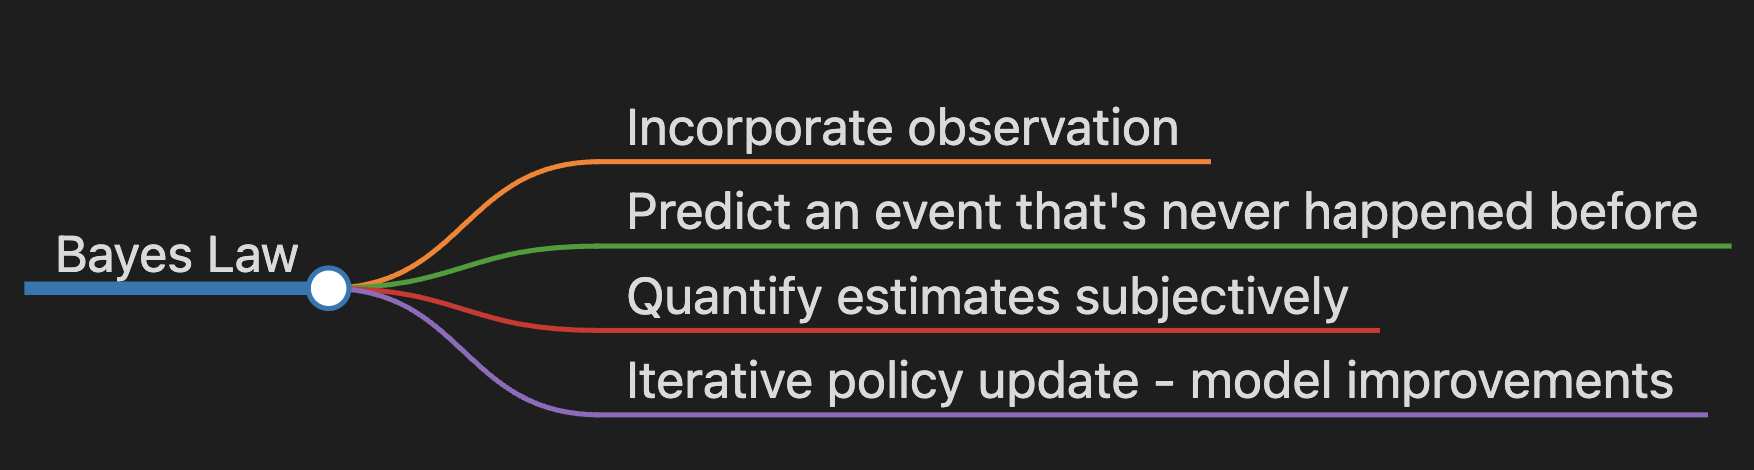

In [11]:
Image(filename='images/session2/bayes_law_allows_us.png')

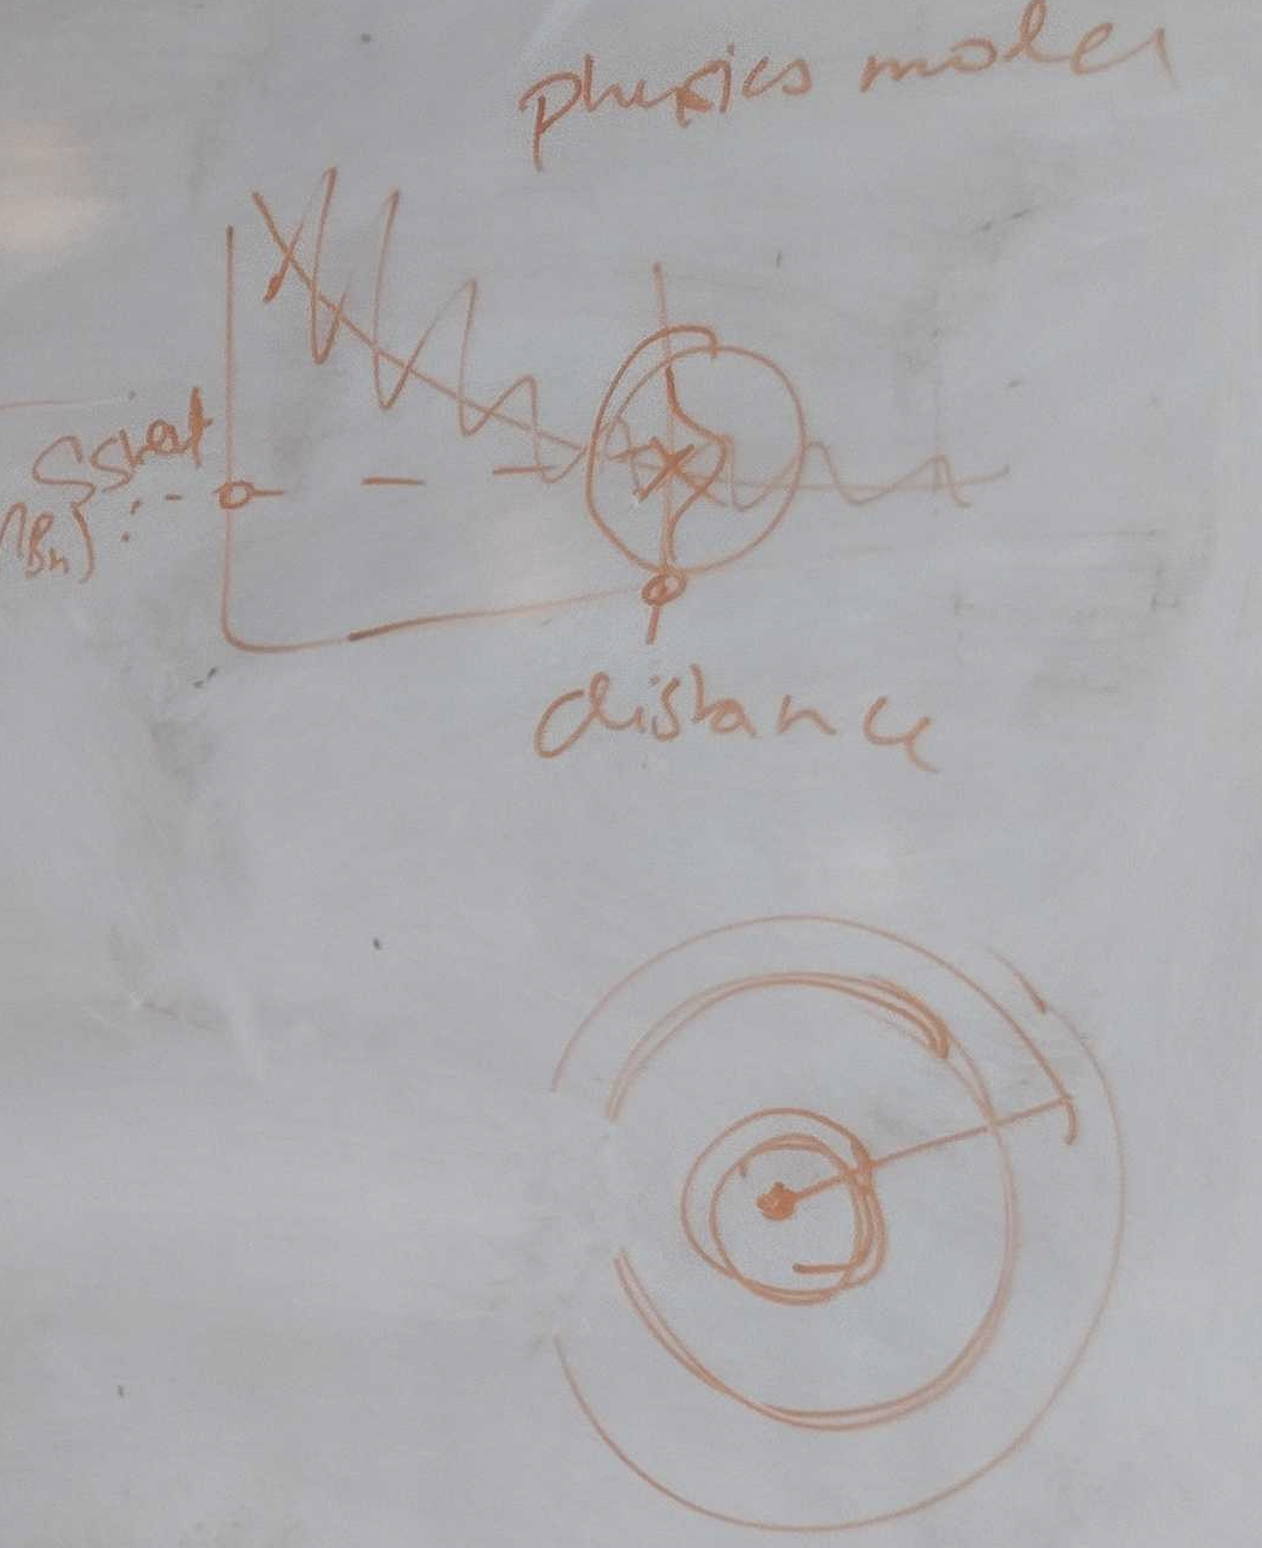

In [12]:
Image(filename='images/session2/signal_strength_example.png')

- $B_1$: Have COVID
- $B_2$: Don't have COVID
- $A$: tested positive

$$P(B_1|A)=\frac{P(\text{tested + | have COVID})P(\text{have COVID})}{P(\text{tested + | have COVID})P(\text{have COVID}) + P(\text{tested + | don't have COVID})P(\text{don't have COVID})}$$
Note
$$=\frac{P(A | B_1)\underbrace{P(B_1)}_\text{prior}}{P(A | B_1)P(B_1) + \underbrace{P(A | B_2)}_\text{false positive rate}$P(B_2)}$$

Generalizing the above:
$$=\boxed{\frac{P(A | B_i)P(B_i)}{\sum_{j=1}^nP(A | B_i)P(B_i)}}$$

### Notes on Sensitivity of Models
- Case of disease
    - P(D) very low to begin with
    - Want to make the model very sensitive to catch as many true positive as possible, even if it produces some false positives
- How sensitive is good for the model?
    - Application dependent
    - Try to strike a balance
    - Hyper parameter adjustments are important (but no one good way to do it)
- Need for striking the balance between **sensitivity (true positive rate)** and **specifity (true negative rate)** of the model. They are inversely related.
- Also need to consider many **confounding factors** in your analysis (e.g. Did the patients closely follow the COVID test kit test instruction?)
- High true positive rate 
    - Catch the disease well, but high false positive
- High true negative rate
    - You may miss true positive cases
- This impacts most ML applications
    - Striking a good balance may be more of an art as of now

## AI doom, Subjective Bliefs and Bayesian Probability
https://x.com/AravSrinivas/status/1737523523294527904?s=20

- obs: Observation
- doom: AI will severely harm humanity

$$P(doom|obs)=\frac{P(\text{obs | doom})P(\text{doom})}{P(\text{obs | doom})P(\text{doom}) + P(\text{obs} | \neg \text{ doom})P(\neg \text{ doom})}$$

- Shows how to incorporate new evidence into the predictor through "observation"
- P(doom) is subjective
- if $P(\text{doom}) = 0$, then the model will never update, because $P(\text{obs | doom})\cdot P(\text{doom})$ (the numerator) is always $0$.
- if $P(\text{doom}) ~= 1$, then model will not update significantly (practically remains at 1)

#### Interpretation
- If you start with a very strong belief, the belief may not get updated
- If you start with an open mind, the model will update, adapting to the new observation each iteration
- The model updates the way our belief system updates
- In theory, no matter where you start the Bayesian model, given a correct update rule (this is the hard part in real life), the the posterior will guranteed to converge to the correct probability


## Birthday Paradox
Find the probability that two or more people in a class of size n have the same birthday.

#### Computation
$$1 - P(\text{ no 2 peaple share their birthday })$$
$$1 - \frac{365 \cdot 364\cdot 363\cdot ... \cdot (365-n+1)}{365\cdot 365\cdot ... \cdot 365}$$
$$1 - \frac{365 \cdot 364\cdot 363\cdot ... \cdot (365-n+1)}{365^n}$$

### Take Away
- Conditional probability is counterintuitive

## Monte Hall Problem

"Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?"
https://en.wikipedia.org/wiki/Monty_Hall_problem



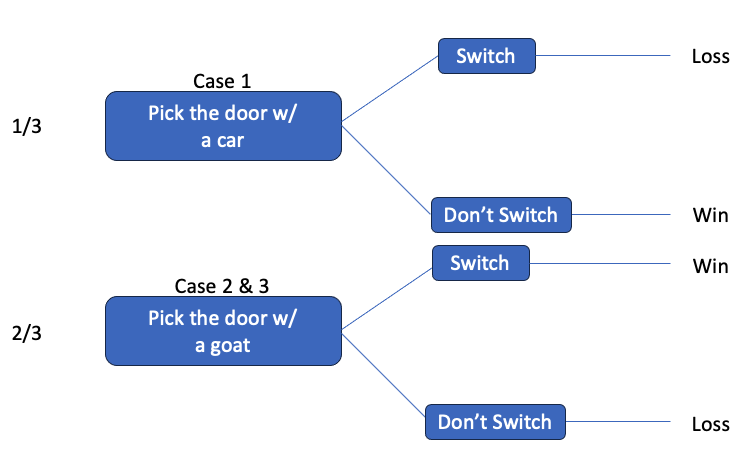

In [13]:
Image(filename='images/session2/monte_hall.png')

### Takeaway
- Most people would pick "not switch" options
- If your policy is "Don't switch", then $P(\text{Win}) = \frac{1}{3}$
- If your policy is "Switch", then $P(\text{Win}) = \frac{2}{3}$

### Bayesian Version of this...
- The major difference between Bayesian and the Conditional Probability perspective is that the decision should be made based on "obs" (i.e. host's action)
- Case 1 still has 1/3 winning if you switched the door, and Case 2 has 2/3.

### Fun Read
- ["Behind Monty Hall's doors: Puzzle, debate and answer?"](https://x.com/peterdodds/status/814125622847041540?s=20) - From 1991: How a simple puzzle fooled many academics.


$$\require{cancel}$$  

## Review: Chain Rule (Probability)

#### Defnition
$$P(\bigcap_{i=1}^{n}A_i)=P(A_1 \cap A_2 \cap ... \cap A_n)$$
By definition,
$$=P(A_1) \cdot P(A_2|A1) \cdot P(A_3|P(A_1 \cap A_2) \cdot P(A_n | A_1 \cap ... \cap A_{n-1})$$
To show that this is true,
$$=\frac {P(A_1 \cap A_2)}{P(A_1)} \cdot \frac {P(A_1 \cap A_2 \cap A_3)}{P(A_1 \cap A_2)} \cdot \frac {P(A_1 \cap A_2 \cap A_3 \cap A_4)}{P(A_1 \cap A_2 \cap A_3)} \cdot  ... \cdot  \frac {P(A_1 \cap A_2 \cap ... \cap A_n)}{P(A_1 \cap A_2 \cap ... \cap A_{n-1})} $$
$$={\cancel{P(A_1)}}\frac {\cancel{P(A_1 \cap A_2)}}{\cancel{P(A_1)}} \cdot \frac {\cancel{P(A_1 \cap A_2 \cap A_3)}}{\cancel{P(A_1 \cap A_2)}} \cdot \frac {\cancel{P(A_1 \cap A_2 \cap A_3 \cap A_4)}}{\cancel{P(A_1 \cap A_2 \cap A_3)}} \cdot  \cancel{...} \cdot  \frac { P(A_1 \cap A_2 \cap ... \cap A_n)}{\cancel{P(A_1 \cap A_2 \cap ... \cap A_{n-1}})} $$

$$P(\bigcap_{i=1}^{n}A_i)=\prod_{i=1}^n P(A_i|\bigcap_{j=1}^{i-1}A_j)$$
Given, $P(A_1|A_1)=P(A_1)$.
- Note that this may be more correct...
$$P(\bigcap_{i=1}^{n}A_i)=P(A_1)\prod_{i=2}^n P(A_i|\bigcap_{j=1}^{i-1}A_j)$$


## Belief Network
- DAG (edges show the causality)
- Either Burglarly or Earth Quake sets off the alarm
- Two neighbors
    - John - call if heard the alarm at a higher likelihood than Mary
    - Mary - call if heard the alarm at a lower likelihood than John
    
- Note what needs to add up to one:
    - $P(A|B, E)+(\neg A| B, E)=1$
    - $P(A | B, \neg E) +P(\neg A| B, \neg E)=1$
    - Notice th pattern, $A$ and $\neg A$ in the first term, not the conditioned part
- The model is called "Probabilistic Graph Model"

#### Degree of Freedom
- In general, we need $2^5-1$ parameters to fully describe the probability space
- Note we only have 10 params here because os the dependencies among nodes

### Problem
Given this scenario and the probabilities(see the whiteboard drawing below), calculate the joing probability that neither John or Marri calls, and there is both burgrary and arth quake.
$$P(\neg J, \neg M, B, E)$$

- Leverage on the existing relationship between random variables, reduce the model complexity
    - Here we only have 10 params
    - Allows decoupling of portions (i.e. calls and triggers of the alarm)
    - Reduction is something like $2^n$ to $n*2^\Delta$
- Use chain rule of of strategy to solve that rule

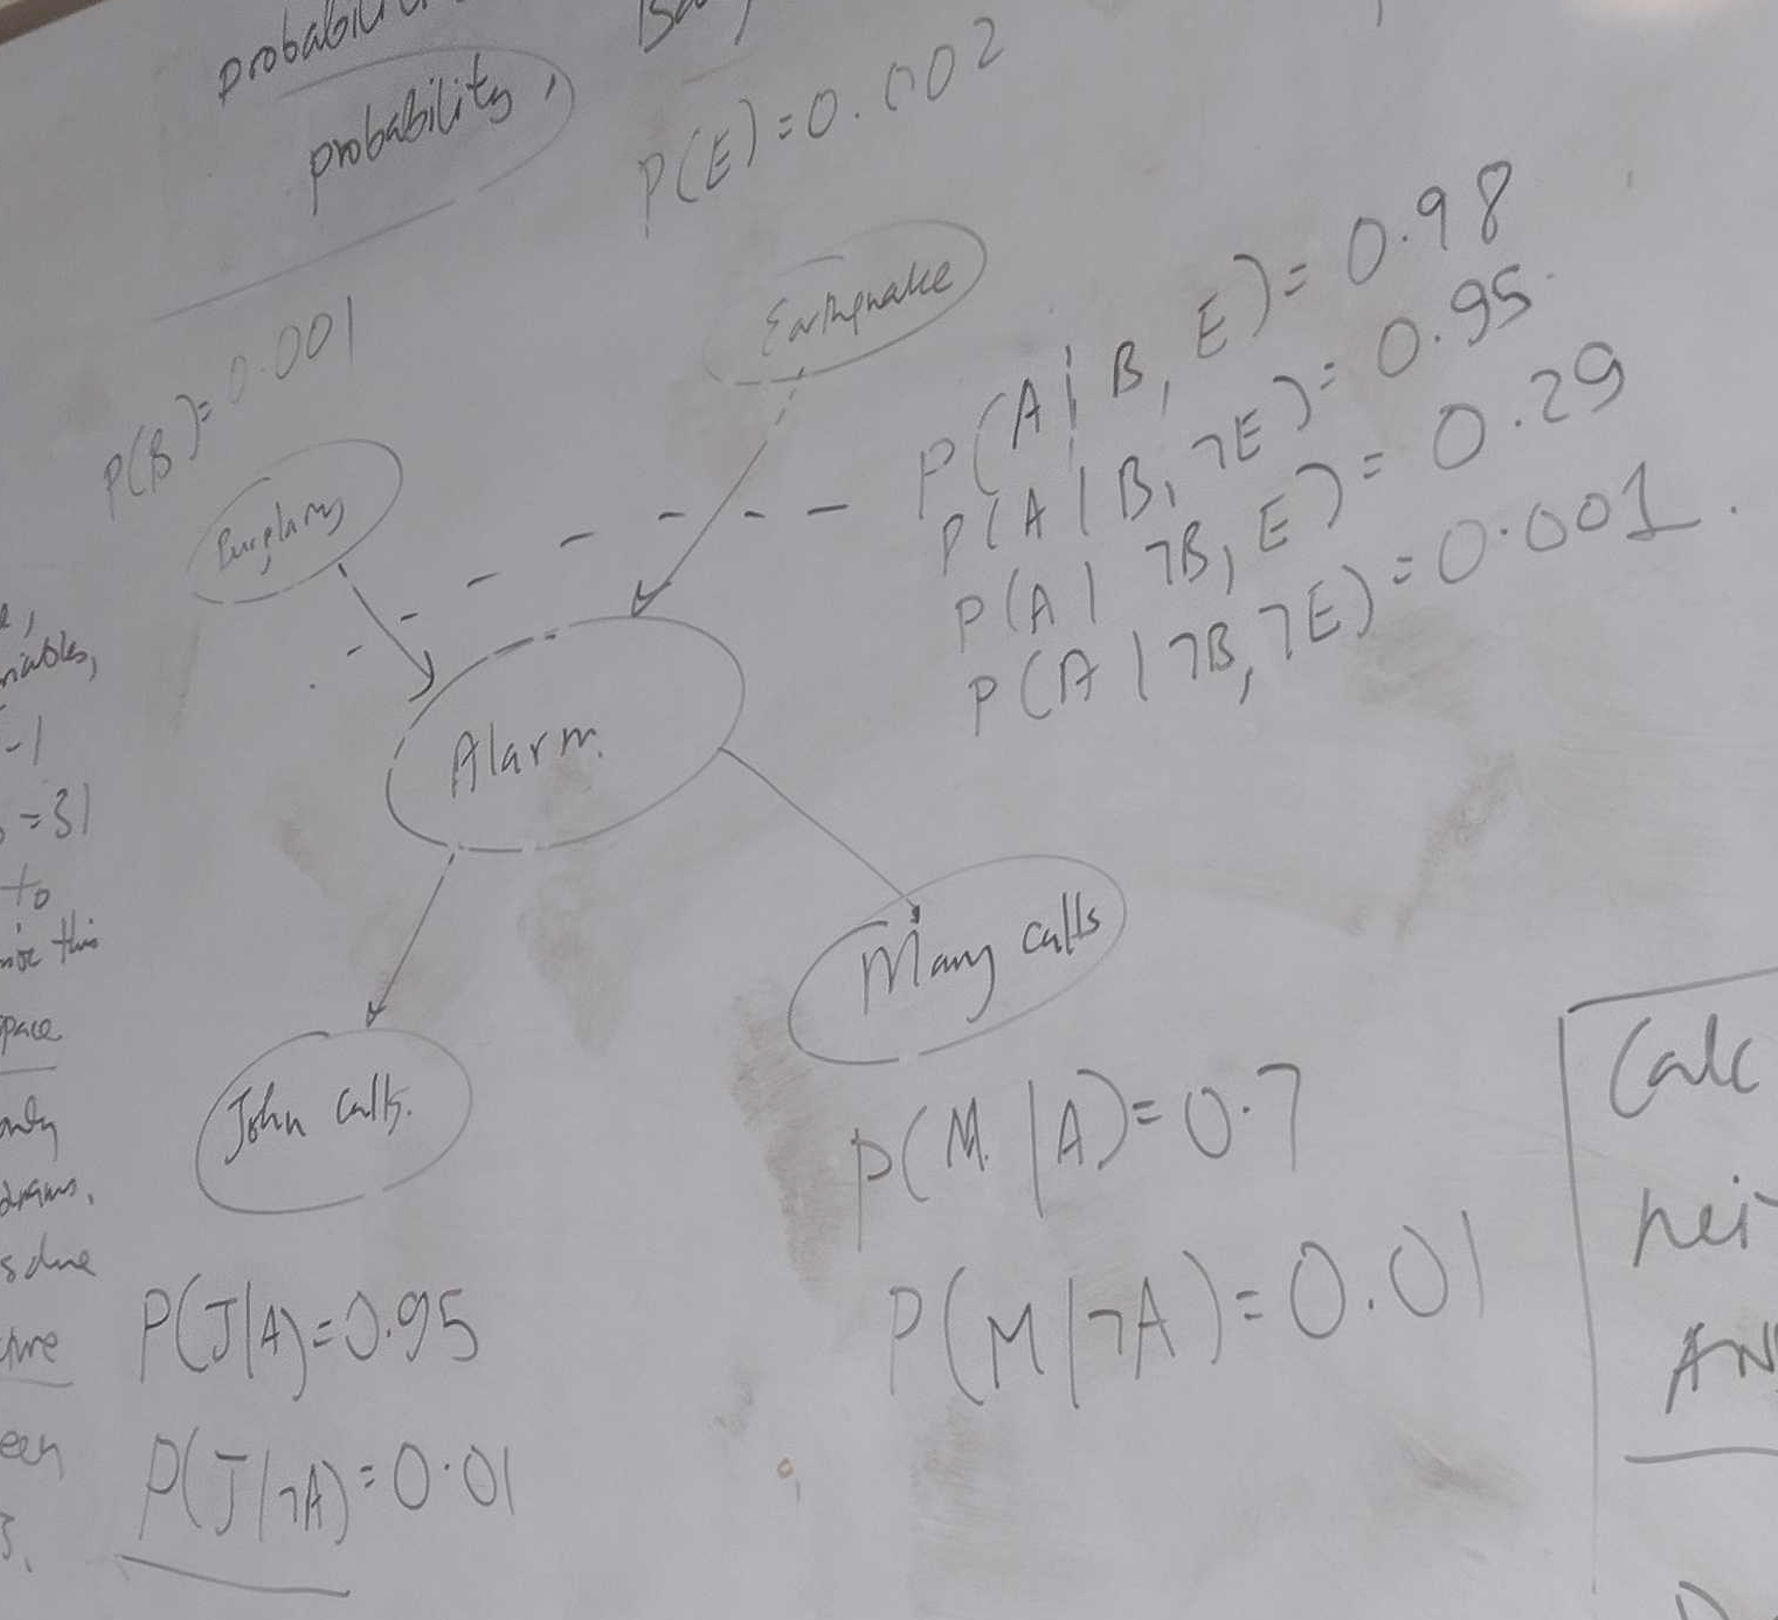

In [14]:
Image(filename='images/session2/belief_network_example.png')

## Books Recommended During This Discussion
- "Artificial Intelligence - A New Synthesis" by Nils J. Nilson
- ["How to Solve It: A New Aspect of Mathematical Method"](https://math.hawaii.edu/home/pdf/putnam/PolyaHowToSolveIt.pdf) by George Pólya
- ["The Art and Craft of Problem Solving"](http://www.gang.umass.edu/~franz/Paul_Zeitz_The_Art_and_Craft_of_Problem_SolvingBookosorg.pdf) by Paul Zeitz